# Projeto: Análise de Vendas de uma Loja 🏬

**Objetivos:**

* Analisar os dados de vendas de uma loja e extrair informações importantes, como:

1. Produtos mais vendidos
2. A distribuição das vendas por categoria
3. Calcular a média de vendas por mês

1. _Carregamento dos dados_

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
vendas = pd.read_csv('vendas.csv')
vendas

,ID_Venda,ID_Cliente,Produto,Categoria,Quantidade,Preço,Data
0,1,982,Monitor,Imagem,4.0,177.44,2024-04-02
1,2,972,Tablet,Acessórios,5.0,984.28,2024-06-11
2,3,530,Mouse,Portáteis,1.0,2177.53,2024-03-08
3,4,854,Teclado,Acessórios,5.0,1514.71,2024-09-29
4,5,932,Fone de Ouvido,Acessórios,3.0,311.76,2024-01-19
...,...,...,...,...,...,...,...
9995,9996,12,Smartphone,Periféricos,5.0,4340.03,2023-11-30
9996,9997,551,Câmera,Acessórios,3.0,4606.46,2024-05-10
9997,9998,985,Câmera,Imagem,2.0,3301.40,2024-04-02
9998,9999,698,Tablet,Portáteis,3.0,1535.11,2024-07-27


In [146]:
clientes = pd.read_csv('clientes.csv')
clientes

,ID_Cliente,Nome,Idade,Gênero,Cidade
0,1,Giovanna Peixoto,44,Feminino,Curitiba
1,2,Ana Vitória Mendes,48,Masculino,Rio de Janeiro
2,3,Breno Silveira,35,Feminino,São Paulo
3,4,Caio Pereira,38,Outro,São Paulo
4,5,Francisco Dias,60,Feminino,Rio de Janeiro
...,...,...,...,...,...
995,996,Vicente Gomes,22,Feminino,Salvador
996,997,Marcos Vinicius Gomes,53,Feminino,Salvador
997,998,Guilherme Almeida,70,Feminino,Porto Alegre
998,999,Miguel Cardoso,30,Masculino,Rio de Janeiro


2. _Pré-processamento e limpeza dos dados_

In [147]:
print(vendas.isnull().sum())

ID_Venda        0
ID_Cliente      0
Produto       197
Categoria       0
Quantidade    199
Preço           0
Data            0
dtype: int64


In [148]:
print(clientes.isnull().sum())

ID_Cliente     0
Nome           0
Idade          0
Gênero         0
Cidade        55
dtype: int64


In [149]:
vendas = vendas.dropna(subset=['Produto', 'Quantidade'])

print(vendas.isnull().sum())

ID_Venda      0
ID_Cliente    0
Produto       0
Categoria     0
Quantidade    0
Preço         0
Data          0
dtype: int64


In [150]:
clientes = clientes.fillna({'Cidade': 'Desconhecida'})

print(clientes.isnull().sum())

ID_Cliente    0
Nome          0
Idade         0
Gênero        0
Cidade        0
dtype: int64


3. _Junção dos dados de vendas com os clientes_

In [151]:
dados_completos = pd.merge(vendas, clientes, on='ID_Cliente')

dados_completos

,ID_Venda,ID_Cliente,Produto,Categoria,Quantidade,Preço,Data,Nome,Idade,Gênero,Cidade
0,1,982,Monitor,Imagem,4.0,177.44,2024-04-02,Calebe da Cunha,65,Outro,São Paulo
1,2,972,Tablet,Acessórios,5.0,984.28,2024-06-11,Vitor Cavalcanti,44,Feminino,Salvador
2,3,530,Mouse,Portáteis,1.0,2177.53,2024-03-08,Felipe Pires,48,Masculino,Porto Alegre
3,4,854,Teclado,Acessórios,5.0,1514.71,2024-09-29,Paulo Cardoso,60,Feminino,Rio de Janeiro
4,5,932,Fone de Ouvido,Acessórios,3.0,311.76,2024-01-19,Alana Farias,28,Feminino,Salvador
...,...,...,...,...,...,...,...,...,...,...,...
9601,9996,12,Smartphone,Periféricos,5.0,4340.03,2023-11-30,Elisa Lima,20,Feminino,Desconhecida
9602,9997,551,Câmera,Acessórios,3.0,4606.46,2024-05-10,Isabella Teixeira,43,Masculino,Porto Alegre
9603,9998,985,Câmera,Imagem,2.0,3301.40,2024-04-02,Samuel da Conceição,33,Masculino,Porto Alegre
9604,9999,698,Tablet,Portáteis,3.0,1535.11,2024-07-27,Dr. Noah Barbosa,60,Feminino,Desconhecida


4. _Conversão da coluna "Data" para datetime_

In [152]:
dados_completos['Data'] = pd.to_datetime(dados_completos['Data'], errors='coerce')

5. _Criando uma coluna de mês/ano_

In [153]:
dados_completos['Mês'] = dados_completos['Data'].dt.to_period('M')

display(dados_completos[['Data', 'Mês']].head())

,Data,Mês
0,2024-04-02,2024-04
1,2024-06-11,2024-06
2,2024-03-08,2024-03
3,2024-09-29,2024-09
4,2024-01-19,2024-01


6. _Agrupando vendas por categoria de produto_

In [154]:
vendas_por_categoria = dados_completos.groupby('Categoria')['Quantidade'].sum()

vendas_por_categoria

Categoria
Acessórios     7165.0
Imagem         7097.0
Periféricos    7348.0
Portáteis      7230.0
Name: Quantidade, dtype: float64

7. _Visualização das vendas por categoria através de um Gráfico de barras_

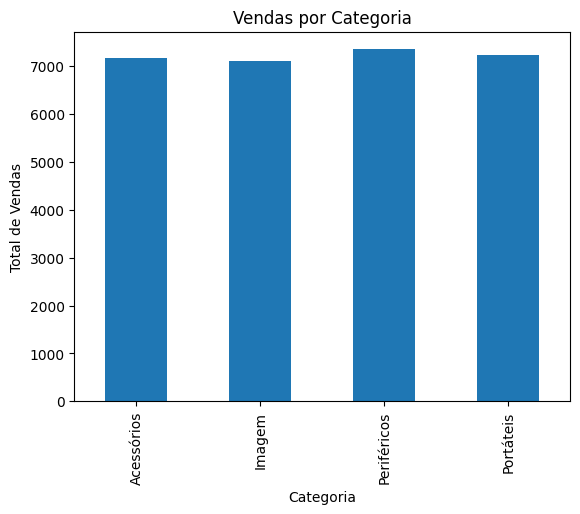

In [155]:
vendas_por_categoria.plot(kind='bar', title='Vendas por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Total de Vendas')
plt.show()

8. _Agrupando vendas por mês_

In [156]:
vendas_por_mes = dados_completos.groupby('Mês')['Quantidade'].sum()

vendas_por_mes

Mês
2023-11     815.0
2023-12    2571.0
2024-01    2355.0
2024-02    2415.0
2024-03    2375.0
2024-04    2254.0
2024-05    2571.0
2024-06    2431.0
2024-07    2370.0
2024-08    2477.0
2024-09    2395.0
2024-10    2404.0
2024-11    1407.0
Freq: M, Name: Quantidade, dtype: float64

9. _Visualização das vendas por mês através de um Gráfico de linha_

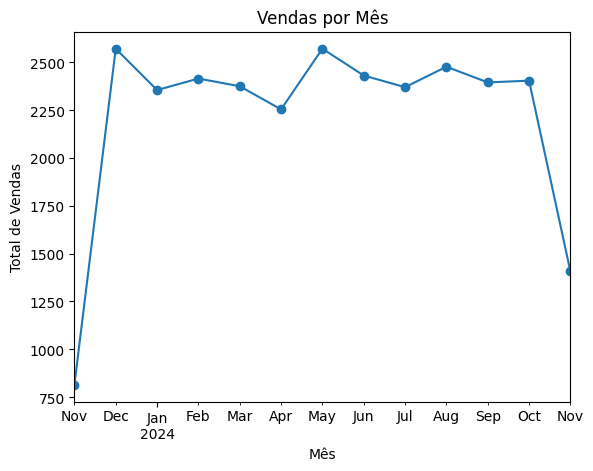

In [158]:
vendas_por_mes.plot(kind='line', title='Vendas por Mês', marker='o')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.show()